In [0]:
# Run if you are executing this notebook in Colab to ensure tf v2.x.x
!pip install -U tensorflow keras

In [1]:
import math

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models, layers, datasets

Using TensorFlow backend.


# A SF Permits Cleaning

### Methode um Y/NaN Spalten zu konvertieren

In [0]:
def replace_y_with_0_1(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Ersetzt Y und leere Felder in Spalten die nur Y und leere Felder erhalten durch 1 und 0 
    :param df: Dataframe in dem sich die Spalten befinden
    :param column: Name der Spalte in der die Werte ersetzt werden sollen
    :return: DataFrame mit modifizierten Spalten
    """
    df[column].fillna(0, inplace=True)
    df[column].replace('Y', 1, inplace=True)
    return df

### Datenset laden

In [0]:
permits_df = pd.read_csv("building_permits.csv")

# B SF Permits Exploration

# C SF Permits Prediction

### Methode für One-Hot-Encoding

In [0]:
def one_hot_encode(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Erzeugt Dummy-Spalten für jeden Wert in der Quell-Spalte.
    
    Beispiel:
    Wenn eine Tabelle die Spalte 'Klasse' mit 0, 1, 2 als Werte hat, werden die Spalte Klasse 0, Klasse 1 und Klasse 2
    erstellt und die Zeilen der Tabelle an den entsprechenden Stellen auf 0 bzw. 1 gesetzt. 
    :param df: Dataframe in dem die zu ersetzende Spalte ist
    :param col: Spalte die One-Hot-Encoded werden soll
    :return: modifizierter DataFrame
    """
    return df.assign(**{str(col + " " + str(val)): [1 if str(val) in str(cell) else 0 for cell in df[col]] 
                                   for val in df[col].unique()})

# D SF Challenges

# E Neural Networks XOR

![XOR Graph](https://github.com/maxmoehl/ATIT2_assignments/blob/max/Assignment_2/XOR.png?raw=1)

w: weight  
b: bias  
t: threshold

Mathematische Funktion:
```
SIGMOID(x) = 1 / (1 + e^(-x))
AND(x, y) = SIGMOID(50x + 50y - 75)
OR(x, y) = SIGMOID(50x + 50y - 25)
NOT(x) = SIGMOID(-50x + 10)

XOR(x, y) = AND(NOT(AND(x, y)), OR(x, y))

XOR(x,y) = SIGMOID(SIGMOID(SIGMOID(50x + 50y - 75) * (-50) + 10) * 50 + SIGMOID(50x + 50y - 25) * 50 - 75)
           \       \       \---------AND---------/             /        \                     /          /
            \       \-------------------NOT-------------------/          \--------OR---------/          /
             \-------------------------------------------AND-------------------------------------------/
```

### Funktionen in Python abbilden und testen

In [5]:
def SIGMOID(x):
    return 1 / (1 + (math.e ** (-x)))

def AND(x, y):
    return SIGMOID(x * 50 + y * 50 - 75)

def OR(x, y):
    return SIGMOID(x * 50 + y * 50 - 25)
    
def NOT(x):
    return SIGMOID(x * (-50) + 10)

def XOR(x, y):
    return AND(NOT(AND(x, y)),OR(x, y))

print(round(XOR(0, 0), 10))
print(round(XOR(0, 1), 10))
print(round(XOR(1, 0), 10))
print(round(XOR(1, 1), 10))

0.0
1.0
1.0
0.0


# F Neural Networks Overfitting

### Daten Laden und splitten

In [0]:
(X_test, Y_test), (X_train, Y_train) = datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

num_classes = 10

### Modell erstellen

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                108170    
Total params: 127,562
Trainable params: 127,562
Non-trainable params: 0
_________________________________________________________________


### Modell in 40 Epochen trainieren und jede Epoche die Genauigkeit messen

In [8]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_data=(X_test, Y_test))

Train on 10000 samples, validate on 50000 samples
Epoch 1/20
10000/10000 [==============================] - 31s 3ms/step - loss: 1.8438 - accuracy: 0.3378 - val_loss: 1.6321 - val_accuracy: 0.4228
Epoch 2/20
10000/10000 [==============================] - 32s 3ms/step - loss: 1.4938 - accuracy: 0.4669 - val_loss: 1.4520 - val_accuracy: 0.4796
Epoch 3/20
10000/10000 [==============================] - 32s 3ms/step - loss: 1.3513 - accuracy: 0.5273 - val_loss: 1.4279 - val_accuracy: 0.4885
Epoch 4/20
10000/10000 [==============================] - 32s 3ms/step - loss: 1.2418 - accuracy: 0.5611 - val_loss: 1.3349 - val_accuracy: 0.5296
Epoch 5/20
10000/10000 [==============================] - 32s 3ms/step - loss: 1.1636 - accuracy: 0.5896 - val_loss: 1.3153 - val_accuracy: 0.5347
Epoch 6/20
10000/10000 [==============================] - 32s 3ms/step - loss: 1.0761 - accuracy: 0.6226 - val_loss: 1.2626 - val_accuracy: 0.5575
Epoch 7/20
10000/10000 [==============================] - 31s 3ms/st

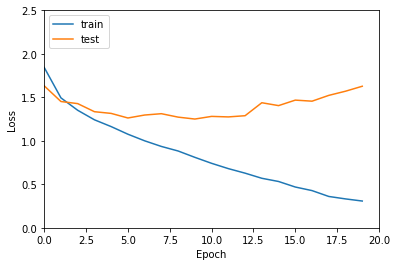

In [9]:
def plot_results(history, epoch_lim=20):
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.ylim([0, 2.5])
  plt.xlim([0, epoch_lim])
  plt.legend(loc='upper left')

plot_results(history)

In [10]:
print("Train accuracy: {}%".format(round(history.history['accuracy'][-1] * 100, 2)))
print("Test accuracy: {}%".format(round(history.history['val_accuracy'][-1] * 100, 2)))

Train accuracy: 90.94%
Test accuracy: 56.78%


Wie man am Graphen sehen kann steigt der Loss der Test-Daten nach Epoche 20 wieder stark an, während der Trainings-Loss weiter fällt und das Modell beginnt die Bilder auswendig zu lernen anstatt die Muster zu erkennen. Das ist auch daran zu erkennen, dass die Accuracy auf den Trainings Daten bei ca 90% liegt und auf den Test Daten nur bei um die 60%.

Das liegt in diesem Fall besonders daran, dass es viel zu wenig Trainings-Daten sind und das Modell für zu viele Epochen trainiert wird.

# G Neural Networks Overfitting

In [0]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

num_classes = 10

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [13]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=15, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 72s 1ms/step - loss: 1.6217 - accuracy: 0.4083 - val_loss: 1.3799 - val_accuracy: 0.5025
Epoch 2/15
50000/50000 [==============================] - 72s 1ms/step - loss: 1.2940 - accuracy: 0.5380 - val_loss: 1.2133 - val_accuracy: 0.5622
Epoch 3/15
50000/50000 [==============================] - 71s 1ms/step - loss: 1.1357 - accuracy: 0.5982 - val_loss: 1.0966 - val_accuracy: 0.6134
Epoch 4/15
50000/50000 [==============================] - 71s 1ms/step - loss: 1.0330 - accuracy: 0.6370 - val_loss: 1.0196 - val_accuracy: 0.6421
Epoch 5/15
50000/50000 [==============================] - 71s 1ms/step - loss: 0.9602 - accuracy: 0.6619 - val_loss: 1.0083 - val_accuracy: 0.6498
Epoch 6/15
50000/50000 [==============================] - 70s 1ms/step - loss: 0.9007 - accuracy: 0.6828 - val_loss: 0.9314 - val_accuracy: 0.6766
Epoch 7/15
50000/50000 [==============================] - 71s 1ms/st

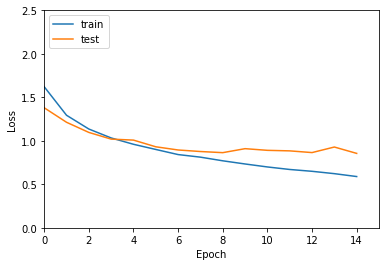

In [14]:
plot_results(history, epoch_lim=15)

# H Feedback